In [85]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from matplotlib.image import imread

In [86]:
labels = {
    "notumor" : 0, "glioma" : 1, "meningioma" : 2, "pituitary" : 3
}

In [87]:
# Function to load data from a given directory

def load_data_from_directory(directory_path):
    img_list = []
    lbl_list = []
    for sub_directory in os.listdir(directory_path):
        subdir_path = os.path.join(directory_path, sub_directory)
        for files in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, files)
            img = imread(file_path)
            img_resized = cv2.resize(img, (64,64))
            img_list.append(np.array(img_resized))
            lbl_list.append(sub_directory)
            data = pd.DataFrame({'image':img_list,'label':lbl_list})
            
    return data

# Load training and testing data

Train_data = load_data_from_directory('Data/Training')
Test_data = load_data_from_directory('Data/Testing')

In [88]:
Train_data.head()

,image,label
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [1, 1, 1], ...",glioma
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [1, 1, 1], ...",glioma
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [1, 1, 1], ...",glioma
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma


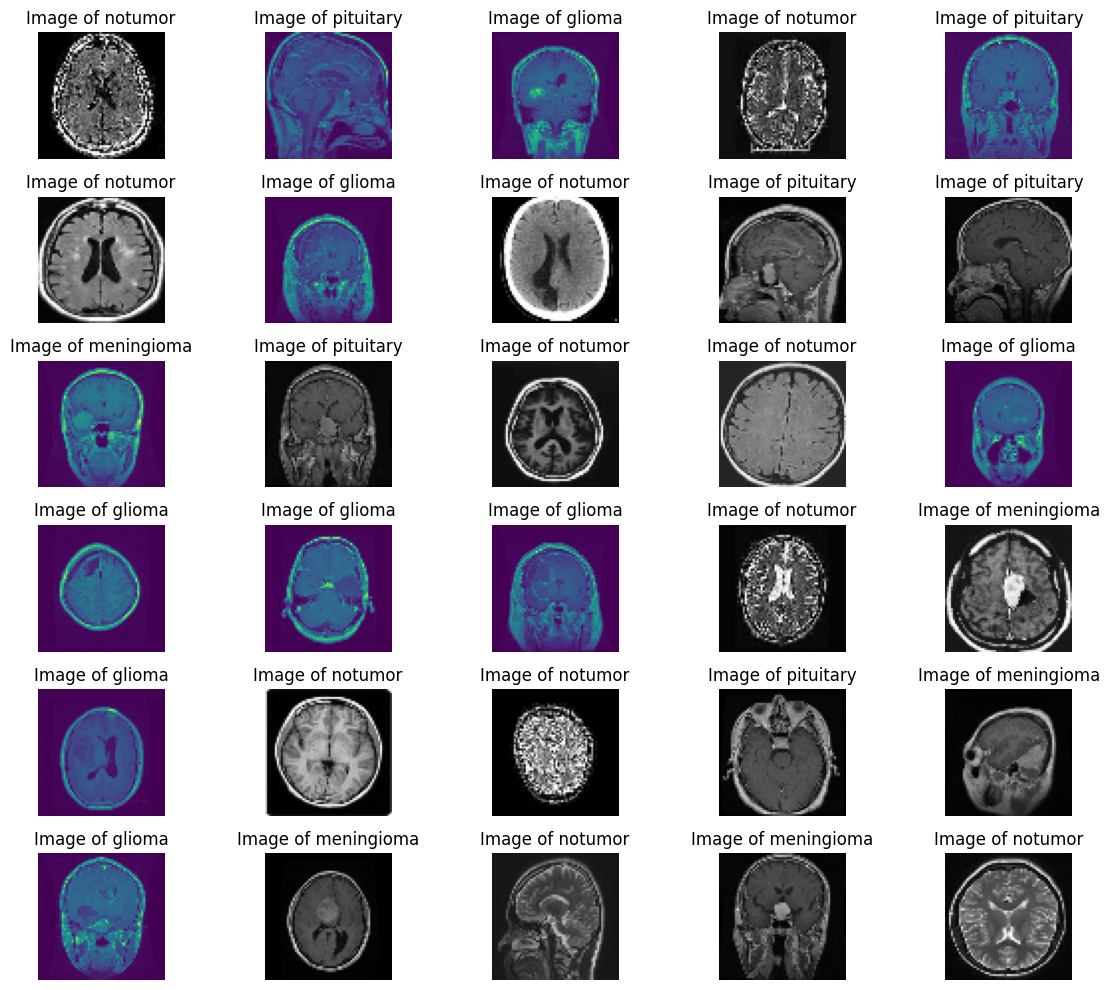

In [89]:
plt.figure(figsize=(12,10))
num_images = 30

# Randomly select indices from the DataFrame
random_indices = np.random.choice(len(Train_data), num_images, replace=False)

# Iterate over selected indices to display images
for i, idx in enumerate(random_indices, 1):
    plt.subplot(6, 5, i)
    plt.axis('off')
    img = Train_data['image'].iloc[idx]
    
    # Ensure image data type is uint8 (byte)
    img = img.astype(np.uint64)  
    
    # Display the image
    plt.imshow(img)
    
    # Get the corresponding label from the 'label' column
    label = Train_data['label'].iloc[idx]
    
    # Set the title of the subplot
    plt.title(f'Image of {label}')

plt.tight_layout()
plt.show()

In [90]:
X_train = Train_data['image']
processed_images = []

for img in X_train:
    # Check if the image is RGB
    if img.shape == (64, 64, 3):
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Check if the image is RGBA
    elif img.shape == (64, 64, 4):
        img = cv2.cvtColor(img, cv2.COLOR_RGBA2GRAY)
    # Append the processed image to the list
    processed_images.append(img.reshape(4096))
X_train = np.array(processed_images)
y_train = Train_data['label']
y_train = y_train.map(labels)

In [91]:
X_test = Test_data['image']
processed_images = []
for img in X_test:
    if img.shape == (64,64,3):
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    elif img.shape == (64,64,4):
        img = cv2.cvtColor(img, cv2.COLOR_RGBA2GRAY)
    processed_images.append(img.reshape(4096))
X_test = np.array(processed_images)
y_test = Test_data['label']
y_test = y_test.map(labels)

In [92]:
X_test.shape

(1311, 4096)

In [93]:
X_train = X_train/255.0
X_test = X_test/255.0

In [94]:
model = Sequential([ 
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  
])

In [95]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [96]:
history = model.fit(X_train, y_train,  
                    epochs=14, 
                    batch_size=32)

Epoch 1/14
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5568 - loss: 1.0297
Epoch 2/14
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7829 - loss: 0.5693
Epoch 3/14
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8054 - loss: 0.4919
Epoch 4/14
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8686 - loss: 0.3647
Epoch 5/14
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8770 - loss: 0.3343
Epoch 6/14
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8950 - loss: 0.2836
Epoch 7/14
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9172 - loss: 0.2255
Epoch 8/14
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9207 - loss: 0.2162
Epoch 9/14
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9414 - loss: 0.1617
Epoch 10/14
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9499 - loss: 0.1422
Epoch 11/14
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9623 - loss: 0.1047
Epoch 12/14
179/179 ━━━━━━━━━━━━━━━━━━━━ 

In [97]:
y_pred = model.predict(X_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [98]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8905 - loss: 0.3009


In [99]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [100]:
incorrect_predictions = np.sum(y_pred_labels != y_test)
print(incorrect_predictions)

93


In [101]:
incorrect_indices = np.where(y_pred_labels != y_test)[0]

In [102]:
reverse_labels = {
   0 : "N" , 1: "G" , 2 :  "M" ,3 : "P"
}

In [103]:
y_pred_labels_mapped = [reverse_labels[label] for label in y_pred_labels]
y_test_mapped = [reverse_labels[label] for label in y_test]

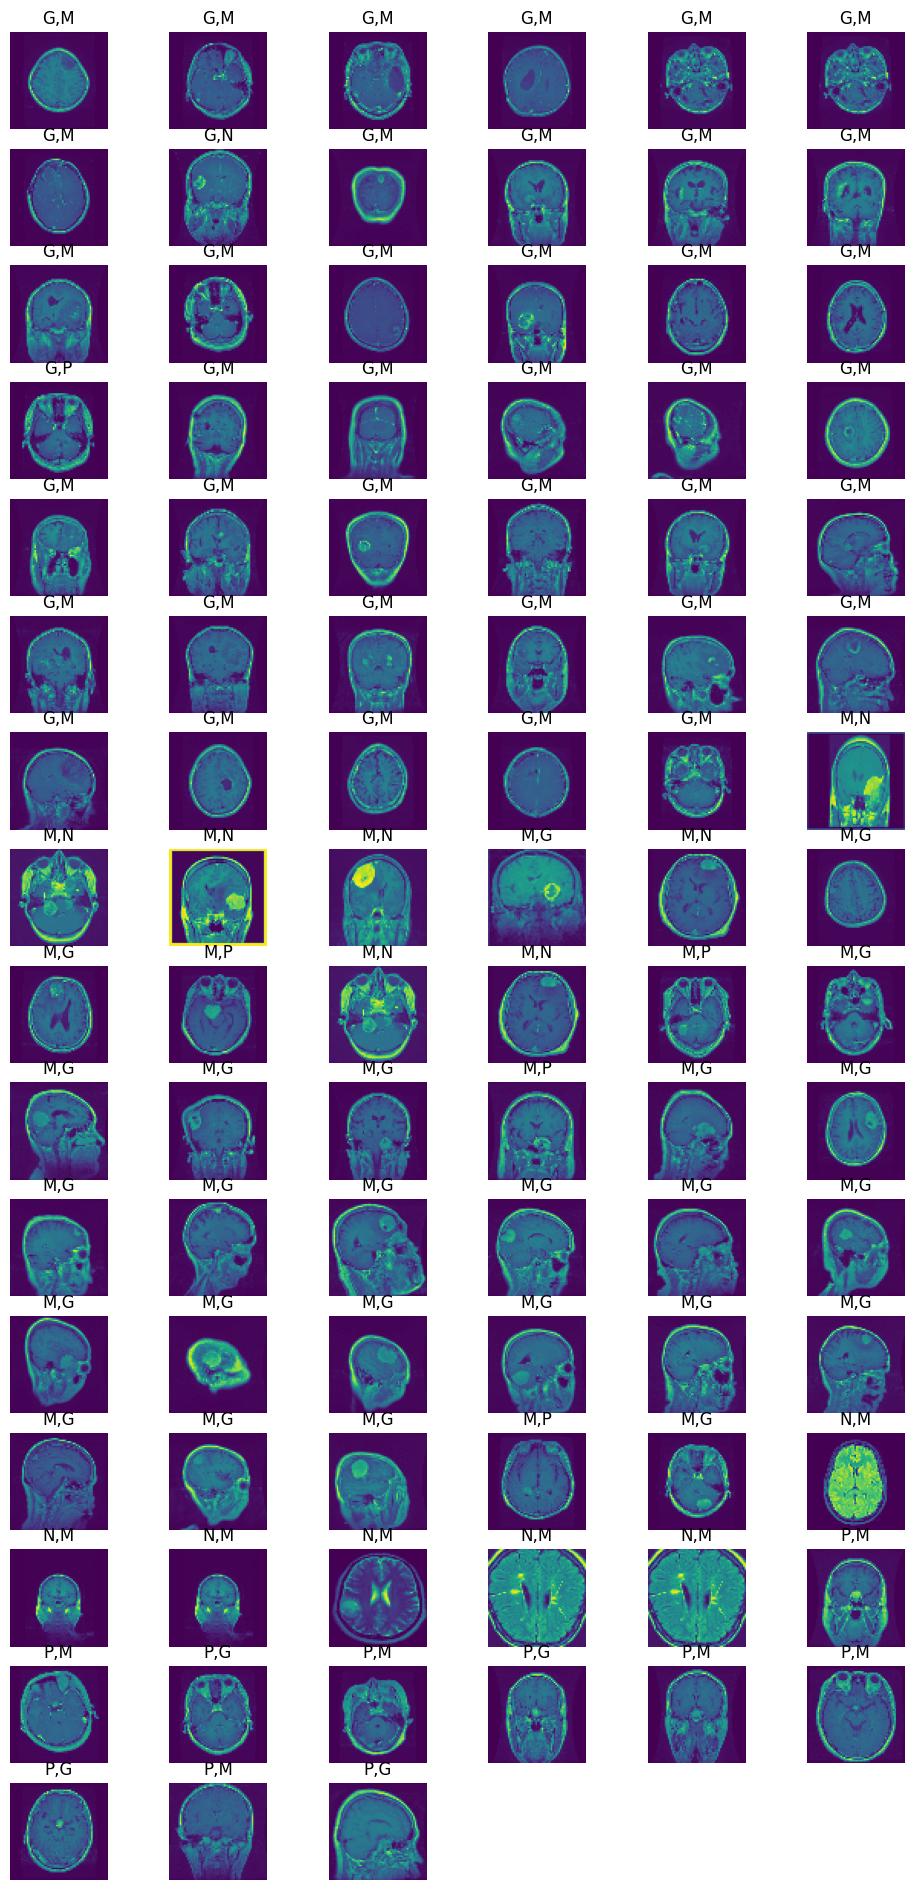

In [104]:
plt.figure(figsize=(12,24))
count = 1
for i in incorrect_indices:
    plt.subplot((incorrect_predictions//6)+1,6,count)   
    plt.axis('off')
    plt.imshow(X_test[i].reshape(64,64))
    plt.title(f'{y_test_mapped[i]},{y_pred_labels_mapped[i]}')
    count += 1

In [105]:
positive_classes = [1,2,3]
negative_classes = [0]

actual_is_tumor = np.isin(y_test, positive_classes)
predicted_is_tumor = np.isin(y_pred_labels, positive_classes)

actual_is_notumor = np.isin(y_test, negative_classes)
predicted_is_notumor = np.isin(y_pred_labels, negative_classes)

correct_predictions1 = np.sum(actual_is_tumor & predicted_is_tumor)
total_predictions1 = np.sum(actual_is_tumor)

correct_predictions2 = np.sum(actual_is_notumor & predicted_is_notumor)
total_predictions2 = np.sum(actual_is_notumor)

correct_predictions = correct_predictions1 + correct_predictions2
total_predictions = total_predictions1 + total_predictions2

accuracy = correct_predictions / total_predictions

print(f"Total predictions: {total_predictions}")
print(f"Correct predictions: {correct_predictions}")
print(f"Accuracy of predicting presence of tumor: {accuracy:.4f}")

Total predictions: 1311
Correct predictions: 1297
Accuracy of predicting presence of tumor: 0.9893
